In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [7]:
from sklearn.model_selection import train_test_split as tts
X_train_f , X_test, y_train_f, y_test = tts(housing.data , housing.target , random_state = 42)
X_train , X_valid , y_train , y_valid = tts(X_train_f , y_train_f , random_state = 42 , test_size = 0.1)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1),
])


In [15]:
model.compile(loss = "mean_squared_error" , optimizer = keras.optimizers.SGD(learning_rate = 1e-3) , metrics = ["mae"])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1231 (4.81 KB)
Trainable params: 1231 (4.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model_history = model.fit(X_train , y_train , epochs = 10 , validation_data = (X_valid , y_valid))

Epoch 1/10
436/436 [==============================] - 1s 3ms/step - loss: 0.4236 - mae: 0.4658 - val_loss: 0.4038 - val_mae: 0.4562
Epoch 2/10
436/436 [==============================] - 1s 2ms/step - loss: 0.4212 - mae: 0.4652 - val_loss: 0.3987 - val_mae: 0.4509
Epoch 3/10
436/436 [==============================] - 1s 2ms/step - loss: 0.4178 - mae: 0.4615 - val_loss: 0.3976 - val_mae: 0.4562
Epoch 4/10
436/436 [==============================] - 1s 2ms/step - loss: 0.4157 - mae: 0.4614 - val_loss: 0.3914 - val_mae: 0.4522
Epoch 5/10
436/436 [==============================] - 1s 2ms/step - loss: 0.4131 - mae: 0.4597 - val_loss: 0.3910 - val_mae: 0.4484
Epoch 6/10
436/436 [==============================] - 1s 2ms/step - loss: 0.4108 - mae: 0.4578 - val_loss: 0.3864 - val_mae: 0.4497
Epoch 7/10
436/436 [==============================] - 1s 2ms/step - loss: 0.4088 - mae: 0.4568 - val_loss: 0.3874 - val_mae: 0.4503
Epoch 8/10
436/436 [==============================] - 1s 2ms/step - loss: 0.

In [23]:
mae_test = model.evaluate(X_test , y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3968 - mae: 0.4508


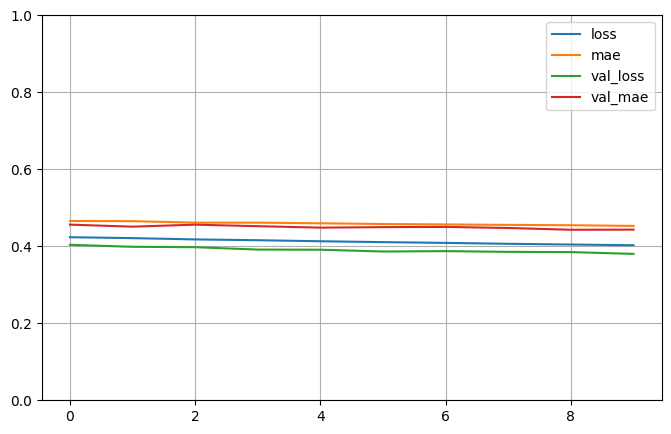

In [24]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

lets run more epochs to less it down , i am changing the epochs to 10 now , ihave trained this model for 20 epochs before.

In [25]:
model.save("regression_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
